In [83]:
import os
import pickle
import cv2
import matplotlib.pyplot as plt
import numpy as np


cifar_dir = 'cifar-10-batches-py'
images_dir = 'data/test'

def unpickle(file):
    with open(file, 'rb') as fo:
        dict_ = pickle.load(fo, encoding='bytes')
    return dict_

In [84]:
batches_paths = [
    os.path.join(cifar_dir, el)
    for el in os.listdir(cifar_dir)
]

batches_paths = [
    'cifar-10-batches-py/test_batch',
    # 'cifar-10-batches-py/data_batch_1',
    # 'cifar-10-batches-py/data_batch_2',
    # 'cifar-10-batches-py/data_batch_5',
    # 'cifar-10-batches-py/data_batch_4',
    # 'cifar-10-batches-py/data_batch_3'
 ]
batches_paths

['cifar-10-batches-py/test_batch']

In [85]:
data = []

for path in batches_paths:
    try:
        data.append(unpickle(path))
    except:
        continue

In [86]:
labels = set()
for batch in data:
    try:
        for label in batch[b'labels']:
            labels.add(label)
    except KeyError:
        for label in batch['labels']:
            labels.add(label)
labels

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [87]:
for label in labels:
    os.mkdir(os.path.join(images_dir, str(label)))

In [88]:
def save_images_to_dir(data, savedir: str = images_dir):
    for batch in data:
        for idx, (img, label) in enumerate(zip(batch[b'data'], batch[b'labels'])):
            r, g, b = np.split(img, 3)
            r = r.reshape((32,32))
            g = g.reshape((32,32))
            b = b.reshape((32,32))
            img = cv2.merge((r,g,b))

            cv2.imwrite(os.path.join(savedir, str(label), '{}.jpg'.format(idx)), img)



save_images_to_dir(data)

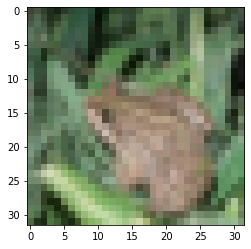

In [89]:
img0 = data[0][b'data'][4]
r, g, b = np.split(img0, 3)
r = r.reshape((32,32))
g = g.reshape((32,32))
b = b.reshape((32,32))
img0 = cv2.merge((r,g,b))
# img0 = img0.reshape((32, 32, 3))
plt.imshow(img0)

In [26]:
data.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])